<p>
<img src="https://drive.google.com/uc?id=1ZHUKcwzA5c-PKUwoGmBG3TsHk6TmZ-Y0" align="left" width="250">
</p>
<p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 2</center></b><h2>
<h3><b><center>Sistemas Jerárquicos de N-cuerpos</center></b><h3>
<h5><center><b>Asignada</b>: 29 de Agosto de 2023</center><h5>
<h5><center><b>Entrega</b>: 12 de Septiembre de 2023</center><h5>
</p>

<hr/>
<b>Nombre</b>: Bryan Camilo Restrepo Arcila
<br/>
<b>Cédula</b>: 1000567825
<br/>
<b>Última actualización</b>:
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es poner a prueba la idea de que es posible simular un  sistema de N-cuerpos jerarquicos usando un *árbol* de sistemas de 2 cuerpos.

En particular compararemos la predicción de las posiciones que para un sistema múltiple de estrellas nos da la simulación con un sistema jerárquico y el mismo resultado pero calculado como si el sistema fuera un sistema de N cuerpos completo.

**Procedimiento**:

El sistema que simularemos es el de un sistema binario formado por dos estrellas "s" y "e".  Alrededor de la estrella "e" gira un planeta "p", a cuyo alrededor, a su vez, gira una luna "L".  Los datos de los cuerpos, dados en unidades canónicas, en las que $U_M = 80$ M$_{\rm Jup}$, $U_L = 0.01$ au, son.

- Masas: s = 1, e = 0.5, L = 0.001, p = 0.01.

- Condiciones iniciales (las posiciones están dadas respecto al cuerpo más masivo de cada subsistema):

   - Sistema p-L:
     - Posición inicial de p : r = [0,0,0]
     - Velocidad inicial de p: v = [0,0,0]
     - Posición inicial de L: r = [0.03,0,0]
     - Velocidad inicial de L: v = [0,0.4,0.1]

   - Sistema e-pL (baricentro de p y L):
     - Posición inicial de e : r = [0,0,0]
     - Velocidad inicial de e: v = [0,0,0]
     - Posición inicial de pL: r = [0,0.4,0]
     - Velocidad inicial de pL: v = [0.9,0,0.2]
     
  - Sistema s-epL (baricentro e y pL):
     - Posición inicial de s : r = [0,0,0]
     - Velocidad inicial de s: v = [0,0,0]
     - Posición inicial de epL: r = [2,3,0]
     - Velocidad inicial de epL: v = [-0.2,0.7,0]



Una vez definidas las condiciones iniciales:

1. Dibujar el árbol del sistema jerárquico como lo hicimos en clase.

2. Simular usando `ncuerpos_solucion` cada subsistema por separado y obtener el vector y la velocidad relativa como función del tiempo de cada subsistema. Para el tiempo total de simulación encuentre el período orbital de cada subsistema ¿cuánto es?. El tiempo de la simulación será igual al período más largo.

3. Suponiendo que el centro de masa de todo el sistema está en reposo en el origen, calcular a partir la solución al problema relativo de cada subsistema, la posición de cada cuerpo en el tiempo.

4. Haga gráficos de las posiciones y una animación que muestre la trayectoria de las partículas.

5. Tomando las posiciones iniciales calculadas en 3, use otra vez `ncuerpos_solucion` para encontrar las posiciones y velocidades de todas las partículas respecto del centro de masa. Haga un gráfico de la solución obtenida y cálcule con el obtenido en 4. ¿Se ven parecidas?

6. Haga gráficos de las componentes x, y, z de la posición de cada partícula del sistema a lo largo del tiempo, calculadas con la aproximación jerárquica (punto 3) y con la solución al sistema completo (punto 5). Un gráfico por cuerpo. Comente su resultado.

7. Haga gráficos de la energía cinética total, la energía potencial total y la energía mecánica total como función del tiempo usando los resultados en 3. El gráfico debe expresarse en unidades más convencionales: en el eje x el tiempo en días,  en el eje y la energía en Joules. ¿Qué observa?

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráficos solicitados en cada punto.

- Datos mínimos:
  - Números solicitados en cada punto.

- Gráficos opcionales:
  - Animación mostrando el movimiento de una de las partículas, predicho con la aproximación jerarquica y con la integración precisa.

  - Gráfico de la energía cinética, potencial y total para la simulación de N-cuerpos (punto 5).

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

In [86]:
""" !pip install -q pymcel
!pip install -q celluloid """

' !pip install -q pymcel\n!pip install -q celluloid '

In [87]:
import pymcel as pc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import HTML
from celluloid import Camera


## Solución

### 1. Dibujar el árbol del sistema jerárquico como lo hicimos en clase.

A continuación se realizara el diagrama de arbol que describe nuestro sistema:

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAasAAADbCAYAAADTRL4YAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAABM5SURBVHhe7d1PTxTLGsfxh/sqMJFEErduXAmJiYfEF6BEEnGjOcuzM2cH4h9gd8LOpcG7ABPJyAswUW9OIqzYsDXBBBN9F9zn110FxTgDDPOvpvv7Sep2d80w914H5jfV9XT12JEzAAAy9p+wBQAgW4QVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVgO688zbmbS60uA/0EGEFoDe2QpMbYQv0CGEFoHd2vB15e1YcAT1DWAHojQfebpW7QK8RVgCAi1keMxvztrxabot9Daf7j7ACgFH3btZsbrPcxhAZ8/0f4bHYp+f0wtJi2HHXJ8NOfxFWAFAFW4/Mvv1tdnTk7at3fDCb8IBK+/ScnoyE7psd6jW9PRwPff01duTCPgB0TqXr8940Z/VeHX309q3Zy5fhoOLW183u3AkH59DoSe/BYcPsatlVnLJbWvFAWQgdTn37G/4+6cmXULymb1958D2bKvsGhLAC0J12YbXrLX6e6ct8Wnyh67AuE2yTk2bfv4eDivv8ucOwunk6mNS37S0NphEOK04DAujOQ2/6ytscPmveDkPTvmgOxT/vulac1qp4u2hQ1QRhBaB/dEoqnpYShZV/DgOdIqwADA7XYeGSCCsAqKPd5FopzS9247g83rcaPfcBYQWgf/TB1acPL3Tjl9naXll+frjh+xe8/upZmE87VVyxE4o7vH/Ht+v9uUiYsALQH0+9TYQWCyzQHw8bHhZJJaCor7nqT2FT9B1481FQMac4E44v6Yf/7Cu9hrvl2/0uXusMhBWA/tD8lH82Fi0tspB+X4+FyiGsAADZI6wAoHa0nl8jzCl+CseXdNV/dkmv4XZ9e6M/awUSVgBQO+NmT2+WawdOeGitXXJFi8KU2eZeWQ2ouos+rWzBcksARkdcbomPrdphZAUAyB5hBQDIHmEFAMgeYQUAyB5hBaBzY960npy2sS17k7Sv2zXngICwAnA5qlDWvapUmKel5XRTPgVU2qfnsDYgeoCwAnA5r7zFZZRuh60CqrmPsEIPEFZA6oW39DRWHdtF7xp/PWwlBlR/Fi8AuCgYOOUPb1+8XSuO6umzt/P+/yvUNIrSLe0j9enuEPEGixpRacX1tK9bXBRcW4QVkIphpbsc1DmwzkNYYcA4DQgAyB5hBQDIHmEFYDDmvOlUobapd964HgvnIKwAdE5TRul8lagvnZtShWDsUxjdCMfaxnDShcTd3J0CtUFYAeg/FazcLXeLrY5F+yrUAM5BWAEYnl5VCaLyCCsAQPYIKwD9p5UtPpa7xZaVLtAhwgpA/+l03743VQMKp//QIVawAFKsYJE3VrCoLUZWAIDsEVYAgOwRVgCA7BFWAC5OK6mrSKJda15KCegRwgqD4R9ys/5hNuZtdbncqm1yF9lq2fJGYA3eu1n/d98st/GPa8z39feV9uk53VgOr7O8evKay7oHTP8RVhi4xaWw4ybjHWYxeg69qSgvNh2LAosvIYO39cjs299lpeTRV+/4YDbhYZL26Tm9CJelxbDjrg/mojlK1zEYGllNFH8+Zq/87+ZZ0ZsfStfPphDSDRVF4dT8ZcM/Gwu9vOFiKpauH8TFBSvu2gV/CTV60oLAh42T90SjoKUV/2NbCB1OffsbZu8vuXpw8ZrauX/6v2sACCsMRhJWG/4hN5/riIqwOttZYaWV1KfK3ZZB1gsxrOrg82ezO3fCwTmKsLp5OpjUt+0tDaZehdUrH6U9i2/2YBBWGAzCqhrSsGrHR87Wr5Hz27dm//tfOKi45887HFkRVkD3CKtqOC+s+jWiwtlqEFYUWAC4HAWTvupqJBUpzIA+IKwAdEen/B6Uu8WcFYGFPiCsMHSrY1ZesqFbnCd2/LjVdVjHz58z+xX6MGRrYSvrYYsRsNP9tVfRD3+dPl5zRVhhMK6aNY6suNwjna/69c5sz3/H1b+xfxJOmx5E08n1WJGer78vPf/nPbM3qkDD8Ok9jZ95et94XwbrYeP0fJWor3lu6pn/4cQ+hcvYdLl/Ufp5/fE1z1ftrppNPAoH/UFYYagOvpnN3i73Zzx8DhRW3ib9m/rXdC4kGH9otsC9kPLk782p04Gi1Sx8FPzbqhYaRXO6cLh+THrw6OLhXpgxO9wI+/1BWCE//i196ryKMv+g+2vb7E+Ca7D0vvgX66K1eo/ee4uPa3R1I+xrG0dbCq4Wo2YM2K0eVvP18rXaIKwwevxDb+yp2Wv/YBwPXciQyv/vlrvFVscaTWl+q8WoGTgLYYWhmrxu1vi33P/kI6Vz1wr0D7vZj/5lnaAaTXp/z3uPgRYIKwyV5qBuzpfVfY17Z1ws7KOp2XdmO+tmH5bK56upD0D1sYIFRoOH1apv+l5cwQoWvaM5Kh8FF9dhqaBCpwLj+6fjJ94YZeGCGFlhNPiHHFWAI0bv1743VQMK7x+6wMgKSDGyArLEyAoAkD3CCgCQPcIKAJA9wgoAkD3CCgCQPcIKAJA9wgoAkD3CCoOhNf3GzDa1bFJYKul4uaTwWOxrdcNFAPVGWGGgHk2Z/X1kxf3bdL+qD1oXcOJ03yM/7t/9RgGMIsIKA3V/8+S+fFPh9hErnkzNfcVNGAEgIKwwUDcnw45c9fDyzbm3BQFQe4QVACB7hBUAIHuEFQAge4QVACB7hBWythqvv9KdZROrc2a/wn7q+PltHgcwmggrDMZVs8ZR091+Q998Wg3oj+t6K/X9eme2t1keb+yHi4XDBcSL5bNP0fN1gZae//Oe2RvdVh1AJRBWyNbBNw+m2+X+jIePrr365e21h9FK2X3K+ENufQ9UFWGFkTLuYTQe9tvyQPtr2+xPgguojLEjF/Zxji9fzF6+DAc19fy52Z074aDPdpZ9NPXk5JTgm8mTkZPmrP583yK4dv2Xes3sZ6vHLuIPb/4+24G3a+oAkAPCqgMvXhBW6+tmjx+Hgz5TQP3l28ZDs00PJ/MQivNbLcNK81n+v6/xLBxfBmEFZImw6kAMK40uBvWBnZtrA/4AV3Wfiim0pqBCK0rDKo7AJj2oppfKx6X5Zy6EsAKyRFh1IIbVIEcXOJ/Cynw0FRfD7QphBWSJAguMvKleBRWAbBFWAIDsEVYAgOwRVgCA7BFWAIDsEVYAgOwRVgCA7BFWAIDsEVYAgOwRVgCA7BFWAIDsDTWstKp2vAW5FiblduQAgFbyGFltmS16K9y45H2IkL3jLydt2qxuSw8ALWRzGnBlx0zrvx91cy8ijLQP8wQWgNbyCKsH3IK8Vvz9/qkvJkn7uVk+9GGb08AAfkeBBbIwPhl2tspbSQFAirBCFnY+hh0fdcXcAoCIsMLg+ejpSlNxRbwd/cpTCmwA/I6wQh7CPNYCc5cAWsg2rFbjt+7l0BHoeqw4AZ+WQq/uhs5EfA0qzDKTFFishC7mqgCcZahhNf4wVIO9P33qRyG0t1k+trFvtvnDO73NevAslk8pvNk++dCztdNVZHoNC+Xws/4830WGFg7N7of9aS4IB9BGliOrg28eMLfL/Zl7fuxB9cvbaw+e42/ibqEp5FIKwnhKSd/YmbTP1FV/X0PZukZXb1qMkAFgZOasxj142gXTjk4VtpqYD6OxPQ88Ju3zpS8WGw/K/cUpRsEAfjfyBRabc2af7raZmPdv7Q0fjb323VZzWsjH/FpyOjDMU7abt9SXk+LUcJPj53M6EaicLMNq8rqHzL/l/qdtP/bQaaUYUfmHXKug0mMxoHRaEcPXbo6yEL5YFI8/K+ccf5u3dPpyEsvcU+kc5U8fSXM6EaiWLMNKH2o358tvyQ3/4JlvFVb+4fWPf2g9mgjfpr3p9FH81j2lNQanyv5p36UkerS0mrfUez7pX06+vir7U+kcJYDqyfY04EL4lt3wD6HUcVFF+k08NM+mQhyJxddgcdyK8Pd1qtUXl5QH2l8+GmetSaBaRn7OqplGVDG0UDO7PpJ+avb6jCpRAKOpcmGFarjovOUxH1HNfvRRNEEFVBJhhSxdaN5SfDSlFUp21s0+LJ3MX7JqyYDo33kubP3f/bhpjjHt03MuKv6MCqjiPgUztUdYIVvt5i11qjcNr5uTZV86f9n8M+gj3eVbFbf+7140mfCW9uk5Cp9OpFWf542sUXmEFUbbLaoAs/AkbCVWa6aFTerbL3cvTBeKx7AjrGqPsAJa0fpc8RRU3dp3b51Kw+S6t7AiSVeehi3gxo5c2Mc5Xrwwe/nSbH3d7PHj0Ilqeevtv94u84FdFZ+9XSt3z6V5qXlv6aeI+ra9vS+OSjoFqJFV2teOAlN04SSjZgSEVQcIK6AJYYUB4TQgACB7Qw2r4uaJc/4FSlv/NhWblksqHot9LEwKALU2/JHVltn0NzsuOdb9qrTe35W0z59zpdOyVwB50mlC/xJatE6un4o/08k1W6iMLE4DbiRlrzOh7PVrUvZa9O0zugKyo+vZ0vkqUV/z3JT+nmOf5rP0M2pr6mgSH0vnqxRwmsNS/z1vXCRcO1mEVbqUjpbZUdkrd/YFKuoiRRbNFIAUW9QaBRYAhkOn9ju9lkrLOGlkRnDVDmEFYPA073TXWyeho1N/CrfLjMww8ggrAIOlEZXmqjoJKo2oPnojqGqLsAIwOAodLVCrhW5jdd9FrHvTz8WfUcEFamX0wmrXf1f9l1VttakiaDW5Hku3t4/P03VbzVbDY9xKAhggFVPFar/YLkLVhOnPsKp+7Qw1rHTPIl1Hld7Zt+jzoX56A73i9g+hb3PNbOPQj73t+X4RTh5Gsx48i9oXP/7HN8V1Wv68hr6VJXTBscpg9fjsdlkRCwDI18iNrA68zejbmbfZcPzLw+m1B48uKC74Y4309gRNFIjxthL6ecrkASBvlZizGvfgaXcr882nHmrpvXaiMBrbu9f+ZwEAeah0gYXmpVR11PKW6Bp9+Wjste82z30BAPIycmGlU3afVDDhrRGOW9mcM5vxMGoVVCq+iAF1oFtvAwCyNnJhNf+0XOh2zNusj5pansLzIHqkBXJDxV9ctV0BpmIKFWyoqkOPTfsut0UHgLyN3mlAD5a4GnvzqGkhVhEmzyla7L9xMhJbiI+dUYgBAMhDpeesms17MFFMAQCjp1ZhBQAYTYQVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVACB7Qw8r3WK+WBm9TZvVLegBALWW/cjqwzyBBQB1l09YPTD7md7Ww9vPzfKhD9vl/agAAPWU9chqPN58asvsIOwCAOon67Da+Rh2fNTV7vb1AIDqyyesfPR0pam4YnqpfGjlKTdNBIA6y7vAIsxjLdwKxwCAWsqywGIldDFXBQCQLEdWC4dm98P+9ByVgABQd3meBrxq9jqUrWt09WY37AMAainbOavxh2YbD8r9xSmznXLXVmMBxnLoCFaTEVi6KsZqi6CLr8HFxgAwGrIusJhfS04HejgphPZ8xKV5rY19s80f/oC3WQ+exfJphTfbJ/Nf5q+RnkbUayj59NisPy+GIAAgX0MPK42gFBxH71uUp181a4TQOXpmdvDNA+Z2+dDMPT/2oPrl7bU/flyU4RZavVag/75YXajiDa7fAoD8ZT2yuohxD552wbSjU4WtrtEKo7E9Dzyu3wKA/I18WLWzOWf26W6ba7TCiO2177aa0wIA5GWkwmryuofMv+X+p20/9tBppRhRrbUOKj0WA0qnFQEA+RupsNJ80835spKvcc9svlVY/TD7Z8ns0cRJRaCKKDTS0nbqmf6j7J/2XVbHAID8jdxpwIVQcNHw4EodF1WkRRmheTaZ3TgppoivoaINAED+Kjtn1Wzeg4liCgAYTbUJK/RXcSG2TrUmF2Sr6Vq49CJtPaeb5bPiBd2ryyevSZEMUH2EFXpny2z628npV137prnDK2mfbgWjApguLYbbx0i7QhsA1UFYoac2noQdN/Oq3H5N5gaLvv3uRleFZJX+loU2ACpl7MiFfZzjxQuzly/Nrl0rWx09f2525044SOhU35V5Dyb/bSoKWmKflr5KVhTRpQPTHlZpXyd0GlBLa63sUMkJ1Alh1YEvX8z++CMc1NT6utnjx+EgQVgB6CfCqkPfv4edmmo3oiSsAPQTYYWeIKwA9BMFFgCA7BFWGBqNvOK1UloKqxtaTqt4rR6UxQPID6cBMTS6u/OfOh24azZ78PsSWheW/LxOMx48oZwdqBpGVhiauJ7jLw+am93cBfPWSdAd7HORMFBFhBWGSiMhFWbM9KBYQsUXj26cFHgAqA7CCkOlW7boRPSnLtcMlGI1/btms+9CB4DKIKwwHD88VGJA+f5e0Xk5KtSIAaVTigCqhwILDE28Nks2DrsrilA14KMt39GagZe8hgtAvggrAED2OA0IAMgeYQUAyB5hBQDIHmEFAMgeYQUAyB5hBQDIHmEFAMgeYQUAyB5hBQDIHmEFAMgeYQUAyB5hBQDIHmEFAMgeYQUAyB5hBQDInNn/AQBr9IeMqliHAAAAAElFTkSuQmCC" />

Para nuestro sistema:

0 --> Representa la luna

1 --> Representa el planeta

2 --> Representa la estrella e

3 --> Representa la estrella s


### 2. Simular usando `ncuerpos_solucion` cada subsistema por separado y obtener el vector y la velocidad relativa como función del tiempo de cada subsistema. Para el tiempo total de simulación encuentre el período orbital de cada subsistema ¿cuánto es?. El tiempo de la simulación será igual al período más largo.

Para que el proceso sea más simple en cuestones de codigo más adelante, primero definamos los diccionarios con las caracteristicas de los subsistemas

In [88]:
#Definiedo los diccionarios:
#Sabiendo que las unidades son canonicas  Um=80Mjup , UL=0.01 au
#definiendo las masas
m0=0.001
m1=0.01
m2=0.5
m3=1

#Sistema p-L
sistema01=[
    {'m':m1,'r':[0,0,0],'v':[0,0,0]}, #caracteristicas del planeta 
    {'m':m0,'r':[0.03,0,0],'v':[0,0.4,0.1]} #carcateristicas de la luna   respecto al planeta 
    
]

#sistema e-pL
sistema01_2=[
    {'m':m2,'r':[0,0,0],'v':[0,0,0]}, #caracteristicas de la estrella e 
    {'m':m0+m1,'r':[0,0.4,0],'v':[0.9,0,0.2]} #carcateristicas del sistema pl, respecto a e
]

#Sistema s-epL
sistema012_3=[
    {'m':m3,'r':[0,0,0],'v':[0,0,0]}, #caracteristicas de la estrella s
    {'m':m0+m1+m2,'r':[2,3,0],'v':[-0.2,0.7,0]} #carcateristicas del sistema epl, respecto a s
]


Ahora simulemos cada sistema por separado, donde debemos tener en cuenta que el tiempo de integración va a estar en unidades canónicas UT

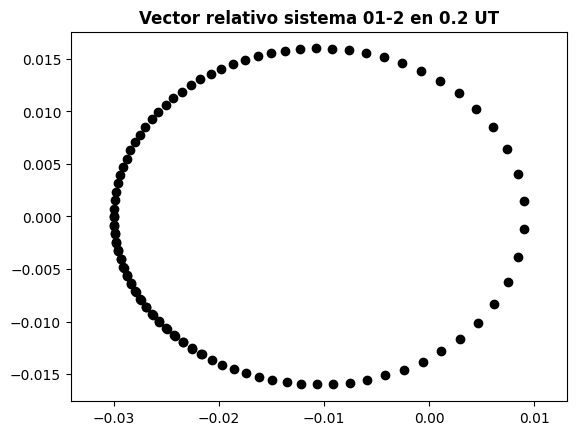

In [89]:
#Primero el sistema planeta-Luna
ts = np.linspace(0,0.2,100) #tiempo de la simulación en unidades canónincas
rs0_1,vs0_1,rps0_1,vps0_1,cuadraturas0_1 = pc.ncuerpos_solucion(sistema01,ts)

#veamos la posicion relativa de la luna respecto al planeta
r01 = rs0_1[0,:,:] - rs0_1[1,:,:]

#para la velocidad
v01 = vs0_1[0,:,:] - vs0_1[1,:,:]

#Ahora grafiquemos el vector relativo
plt.figure()
plt.plot(r01[:,0],r01[:,1],'ko')
plt.axis("equal")
plt.title(f'Vector relativo sistema 01-2 en {ts[-1]} UT',fontweight='bold')
plt.show()

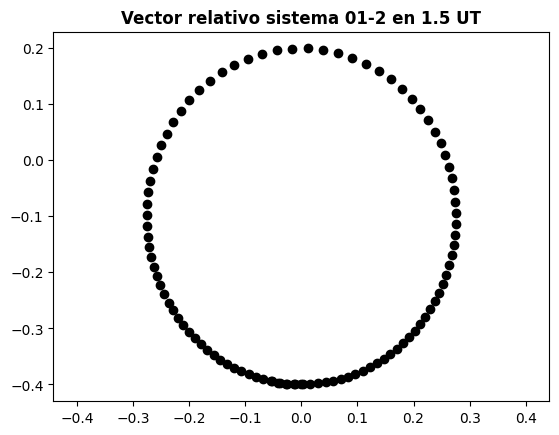

In [90]:
#Ahora para el sistema planeta-Luna  Estrella "e"
ts = np.linspace(0,1.5,100) #tiempo de la simulación en unidades canónincas
rs01_2,vs01_2,rps01_2,vps01_2,cuadraturas01_2 = pc.ncuerpos_solucion(sistema01_2,ts)

#veamos la posicion relativa de la luna respecto al planeta
r012 = rs01_2[0,:,:] - rs01_2[1,:,:]

#para la velocidad
v012 = vs01_2[0,:,:] - vs01_2[1,:,:]

#Ahora grafiquemos el vector relativo
plt.figure()
plt.plot(r012[:,0],r012[:,1],'ko')
plt.axis("equal")
plt.title(f'Vector relativo sistema 01-2 en {ts[-1]} UT',fontweight='bold')
plt.show()

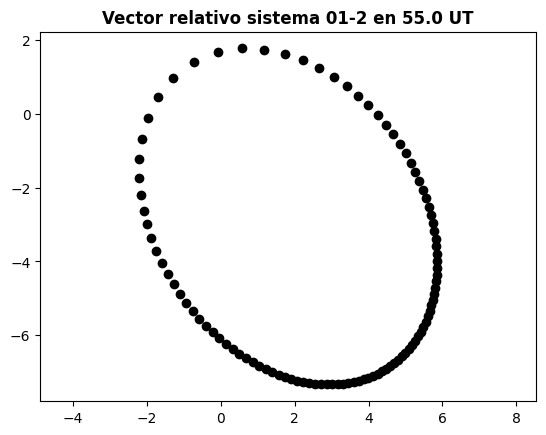

In [91]:
#Ahora para el sistema planeta-Luna-estrella("e") -- estrella ("s")
ts = np.linspace(0,55,100) #tiempo de la simulación en unidades canónincas
rs012_3,vs012_3,rps012_3,vps012_3,cuadraturas012_3 = pc.ncuerpos_solucion(sistema012_3,ts)

#veamos la posicion relativa de la luna respecto al planeta
r0123= rs012_3[0,:,:] - rs012_3[1,:,:]

#para la velocidad
v0123 = vs012_3[0,:,:] - vs012_3[1,:,:]

#Ahora grafiquemos el vector relativo
plt.plot(r0123[:,0],r0123[:,1],'ko') 
plt.axis("equal")
plt.title(f'Vector relativo sistema 01-2 en {ts[-1]} UT',fontweight='bold')
plt.show()

55 UT es nuestro periodo más largo en el que se completa un ciclo entre los astros, así que este será el valor que usemos para las siguientes simulaciones

### 3. Suponiendo que el centro de masa de todo el sistema está en reposo en el origen, calcular a partir la solución al problema relativo de cada subsistema, la posición de cada cuerpo en el tiempo.

Primero hagamos nuestros calculo nuevamente, pero esta vez todos para un mismo tiempo de integración de 55 UT

In [92]:
ts = np.linspace(0,56,500) #tiempo de la simulación en unidades canónincas

#Primero el sistema planeta-Luna

rs0_1,vs0_1,rps0_1,vps0_1,cuadraturas0_1 = pc.ncuerpos_solucion(sistema01,ts)

#veamos la posicion relativa de la luna respecto al planeta
r01 = rs0_1[0,:,:] - rs0_1[1,:,:]
#para la velocidad
v01 = vs0_1[0,:,:] - vs0_1[1,:,:]

#Ahora para el sistema planeta-Luna  Estrella "e"

rs01_2,vs01_2,rps01_2,vps01_2,cuadraturas01_2 = pc.ncuerpos_solucion(sistema01_2,ts)

#veamos la posicion relativa de la luna respecto al planeta
r012 = rs01_2[0,:,:] - rs01_2[1,:,:]
#para la velocidad
v012 = vs01_2[0,:,:] - vs01_2[1,:,:]

#Ahora para el sistema planeta-Luna-estrella("e") -- estrella ("s")

rs012_3,vs012_3,rps012_3,vps012_3,cuadraturas012_3 = pc.ncuerpos_solucion(sistema012_3,ts)

#veamos la posicion relativa de la luna respecto al planeta
r0123= rs012_3[0,:,:] - rs012_3[1,:,:]
#para la velocidad
v0123 = vs012_3[0,:,:] - vs012_3[1,:,:]

v01

array([[ 0.        , -0.4       , -0.1       ],
       [-0.69458071, -0.07601853, -0.01900463],
       [ 0.83968077,  0.1785975 ,  0.04464937],
       ...,
       [ 0.49135202, -0.25631928, -0.06407982],
       [-0.16434252, -0.38512478, -0.09628119],
       [-0.87757982,  0.32246049,  0.08061512]])

Ahora si, veamos las posiciones de los astros, respecto al centro de masa ubicado en el origen

In [93]:
#Primero elegimos el centro de masa de todo el sistema en el origen 
R0123 = np.zeros((500,3))

#Ahora encontramos las posiciones de la estrella s y la del baricentro de la estrella e. el planeta y la luna

#Para la estrella s, y el baricnetro de 012

r3= R0123+ (m0+m1+m2)/(m0+m1+m2+m3)*r0123
R012= R0123- (m3)/(m0+m1+m2+m3)*r0123

#Para la velocidad
v3=  (m0+m1+m2)/(m0+m1+m2+m3)*v0123
vR012= -(m3)/(m0+m1+m2+m3)*v0123

#con este baricentro de 012, podemos encontrar la posición de la estrella e, y el baricentro de 01

r2=R012 + (m0+m1)/(m0+m1+m2)*r012
R01=R012 - (m2)/(m0+m1+m2+m3)*r012

#Para la velocidad
v2=vR012 + (m0+m1+m2)/(m0+m1+m2+m3)*v012
vR01=vR012 - (m3)/(m0+m1+m2+m3)*v012

#para finalizar encontremos las posiciones del planeta y la estrella

r1=R01 + (m0)/(m0+m1)*r01
r0=R01 - (m1)/(m0+m1)*r01

#Para la velocidad
v1=vR01 + (m0)/(m0+m1)*v01
v0=vR01 - (m1)/(m0+m1)*v01

print(r0[0],r1[0],r2[0],r3[0])

[1.35089946 2.11780278 0.        ] [1.32089946 2.11780278 0.        ] [1.32362674 1.97682954 0.        ] [-0.67637326 -1.01455989  0.        ]


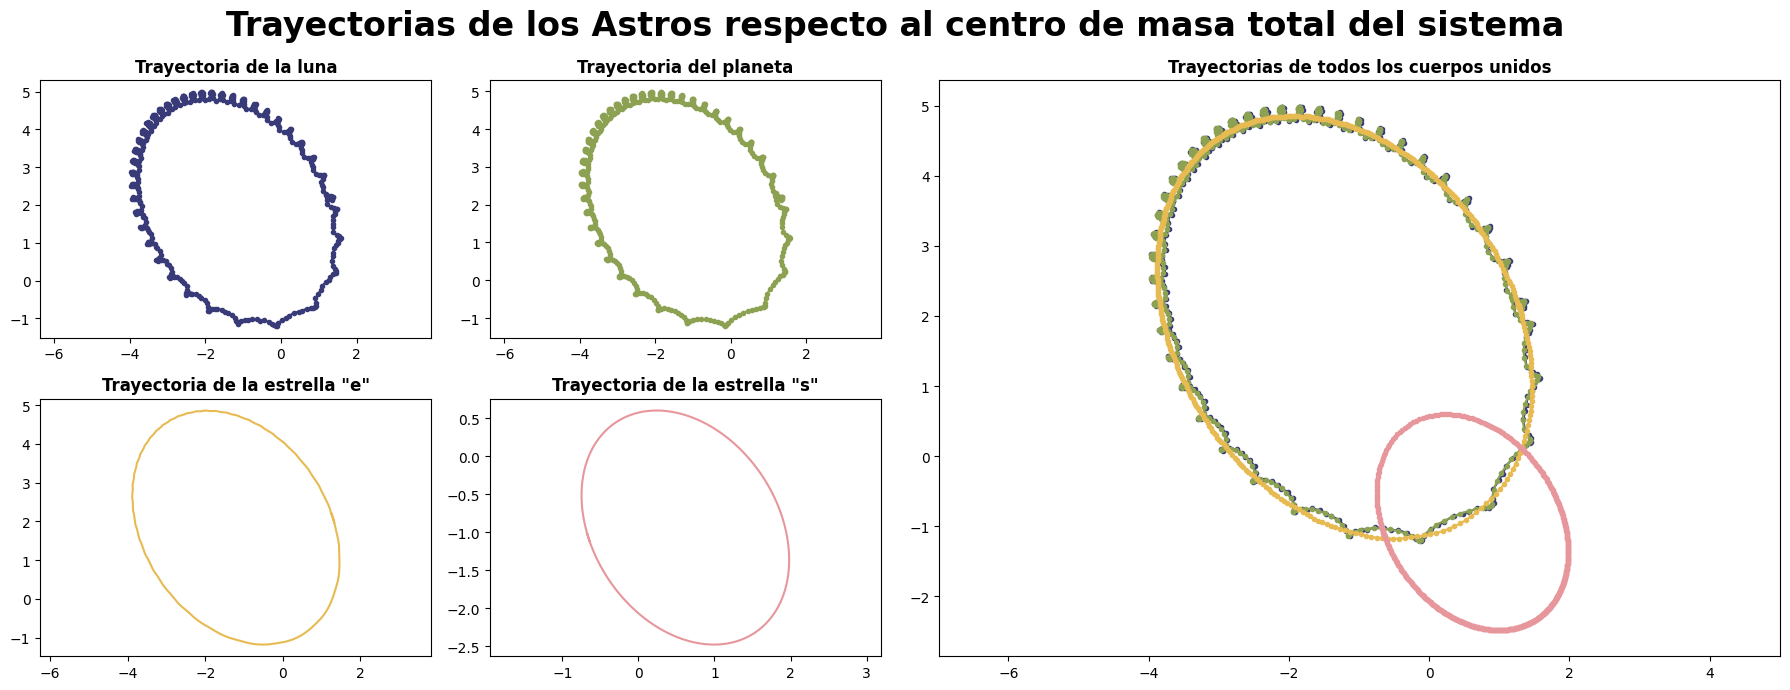

In [94]:
fig = plt.figure(figsize=(18, 7))
color_map = plt.get_cmap('tab20b', 5)
gs = gridspec.GridSpec(2, 4)

def create_subplot(position, data_list, title, marker=None, linestyle='-', color_index=None):

    ax = plt.subplot(position)
    for i, data in enumerate(data_list):
        color = color_map(color_index if color_index is not None else i)
        ax.plot(data[:, 0], data[:, 1], marker=marker, linestyle=linestyle, color=color,markersize=3, label=f'Datos {i+1}')
    ax.set_title(title, fontweight='bold')
    ax.axis('equal')

# Creando los subplots para cada cuerpo individual
create_subplot(gs[0, 0], [r0], 'Trayectoria de la luna', marker='o', linestyle=None, color_index=0)
create_subplot(gs[0, 1], [r1], 'Trayectoria del planeta', marker='o', linestyle=None, color_index=1)
create_subplot(gs[1, 0], [r2], 'Trayectoria de la estrella "e"', linestyle=None, color_index=2)
create_subplot(gs[1, 1], [r3], 'Trayectoria de la estrella "s"', linestyle=None, color_index=3)

# Creando un subplot más grande con todas las trayectorias
big_subplot_position = gs[:, 2:4]
create_subplot(big_subplot_position, [r0, r1, r2, r3], 'Trayectorias de todos los cuerpos unidos', marker='o', linestyle=None)

fig.suptitle('Trayectorias de los Astros respecto al centro de masa total del sistema', fontsize=24, fontweight='bold')
plt.tight_layout()  # Asegurar un buen layout para que los subplots no se superpongan
plt.show()


Haciendo la simulación de nuestro sistema

In [95]:
""" fig = plt.figure()# creando la figura

# Inicializar la cámara para capturar cada cuadro de la animación
c = Camera(fig)

# Establecer que los ejes X y Y tengan la misma escala
plt.axis("equal")

# Bucle que recorre 500 iteraciones para crear la animación
for i in range(500):
  plt.plot(r0[i,0],r0[i,1],'ko')
  plt.plot(r1[i,0],r1[i,1],'bo')
  plt.plot(r2[i,0],r2[i,1],'yo')
  plt.plot(r3[i,0],r3[i,1],'ro')
  
  c.snap()

plt.close(fig)
anim = c.animate(interval=50)  # 50 milisegundos entre cuadros para que la animación no sea muy larga 
HTML(anim.to_html5_video()) """

' fig = plt.figure()# creando la figura\n\n# Inicializar la cámara para capturar cada cuadro de la animación\nc = Camera(fig)\n\n# Establecer que los ejes X y Y tengan la misma escala\nplt.axis("equal")\n\n# Bucle que recorre 500 iteraciones para crear la animación\nfor i in range(500):\n  plt.plot(r0[i,0],r0[i,1],\'ko\')\n  plt.plot(r1[i,0],r1[i,1],\'bo\')\n  plt.plot(r2[i,0],r2[i,1],\'yo\')\n  plt.plot(r3[i,0],r3[i,1],\'ro\')\n  \n  c.snap()\n\nplt.close(fig)\nanim = c.animate(interval=50)  # 50 milisegundos entre cuadros para que la animación no sea muy larga \nHTML(anim.to_html5_video()) '

### 5. Tomando las posiciones iniciales calculadas en 3, use otra vez `ncuerpos_solucion` para encontrar las posiciones y velocidades de todas las partículas respecto del centro de masa. Haga un gráfico de la solución obtenida y cálcule con el obtenido en 4. ¿Se ven parecidas?

In [96]:
ts[1]

0.11222444889779559

In [107]:
#ahora utilicemos n cuerpos solución para encontrar las posiciones de los cuerpos
ts = np.linspace(0,56,10) #tiempo de la simulación en unidades canóninca
#primero definamos el sistema de los 4 cuerpos:
sistema0123=[
    {'m':m0,'r':r0[0],'v':v0[0]},
    {'m':m1,'r':r1[0],'v':v1[0]},
    {'m':m2,'r':r2[0],'v':v2[0]},
    {'m':m3,'r':r3[0],'v':v3[0]}
]


#obj = pc.ncuerpos_solucion(sistema0123,ts)
rs,vs,rps,vps,cuadraturas = pc.ncuerpos_solucion(sistema0123,ts)

In [108]:
rs[0,:,0]

array([1.35089946e+000, 1.14685805e+000, 6.94799039e-310, 6.94789623e-310,
       6.94799039e-310, 6.94798883e-310, 6.94799049e-310, 6.94789643e-310,
       6.94789626e-310, 6.94799032e-310])

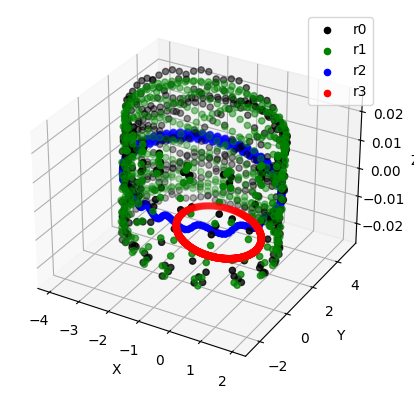

In [111]:
# Crear la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Ajuste para 3D

# Suponiendo que r0, r1, r2, y r3 son 2D y tienen las columnas [x, y, z]
ax.scatter(r0[:,0], r0[:,1], r0[:,2], c='k', marker='o', label='r0')
ax.scatter(r1[:,0], r1[:,1], r1[:,2], c='g', marker='o', label='r1')
ax.scatter(r2[:,0], r2[:,1], r2[:,2], c='b', marker='o', label='r2')
ax.scatter(r3[:,0], r3[:,1], r3[:,2], c='r', marker='o', label='r3')

# Configuraciones adicionales
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


In [110]:
""" fig = plt.figure()# creando la figura

# Inicializar la cámara para capturar cada cuadro de la animación
c = Camera(fig)

# Establecer que los ejes X y Y tengan la misma escala
plt.axis("equal")

# Bucle que recorre 500 iteraciones para crear la animación
for i in range(100):
    plt.plot(rps0123[2,i,0],rps0123[2,i,1],'ko') 
  
    c.snap()
# 
plt.close(fig)
anim = c.animate(interval=50)  # 50 milisegundos entre cuadros para que la animación no sea muy larga 
HTML(anim.to_html5_video()) """

' fig = plt.figure()# creando la figura\n\n# Inicializar la cámara para capturar cada cuadro de la animación\nc = Camera(fig)\n\n# Establecer que los ejes X y Y tengan la misma escala\nplt.axis("equal")\n\n# Bucle que recorre 500 iteraciones para crear la animación\nfor i in range(100):\n    plt.plot(rps0123[2,i,0],rps0123[2,i,1],\'ko\') \n  \n    c.snap()\n# \nplt.close(fig)\nanim = c.animate(interval=50)  # 50 milisegundos entre cuadros para que la animación no sea muy larga \nHTML(anim.to_html5_video()) '